In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df= pd.read_excel('/content/superstore_dataset (1).xlsx')
df.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
#cek umax and min untuk kolom order date untuk tahunnya
df['order_date'].min()


Timestamp('2014-01-03 00:00:00')

In [7]:
df['order_date'].max()

Timestamp('2017-12-30 00:00:00')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  subcategory    9994 n

In [9]:
# cek duplicate
len(df.drop_duplicates()) / len(df)

1.0

tidak ada duplicate

In [10]:
# check missing value
print(df.isnull().sum())

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
subcategory      0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64


tidak ada missing value

In [11]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

==================== row_id ====================


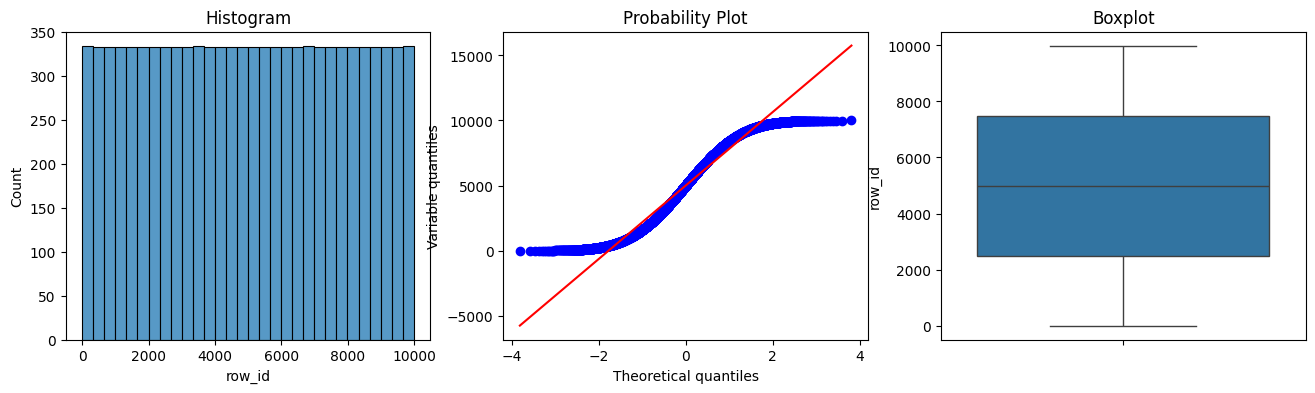

==================== postal_code ====================


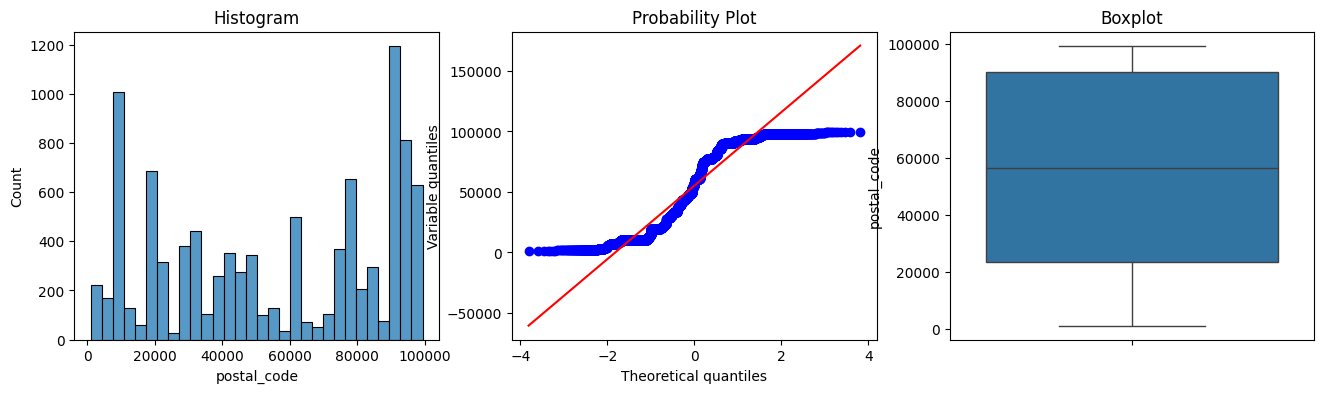

==================== sales ====================


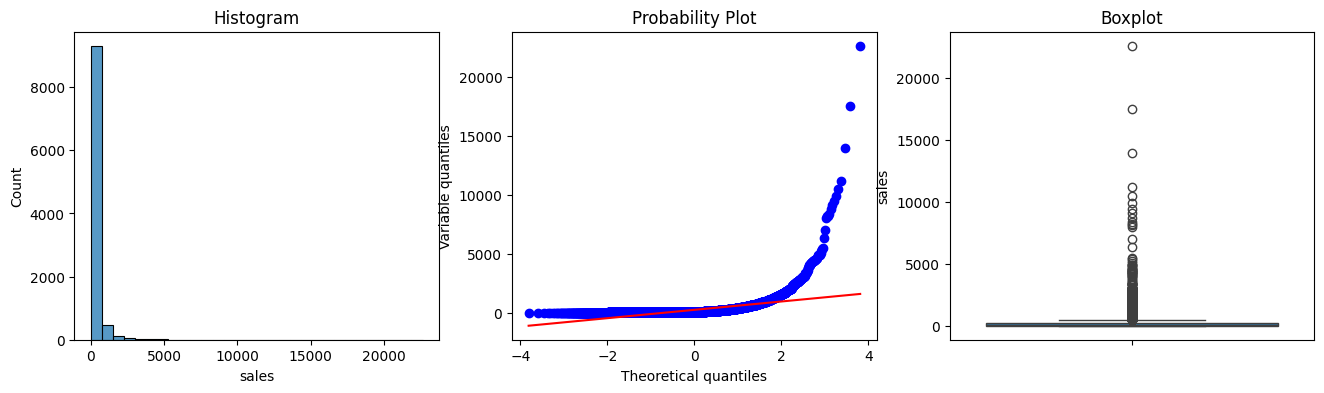

==================== quantity ====================


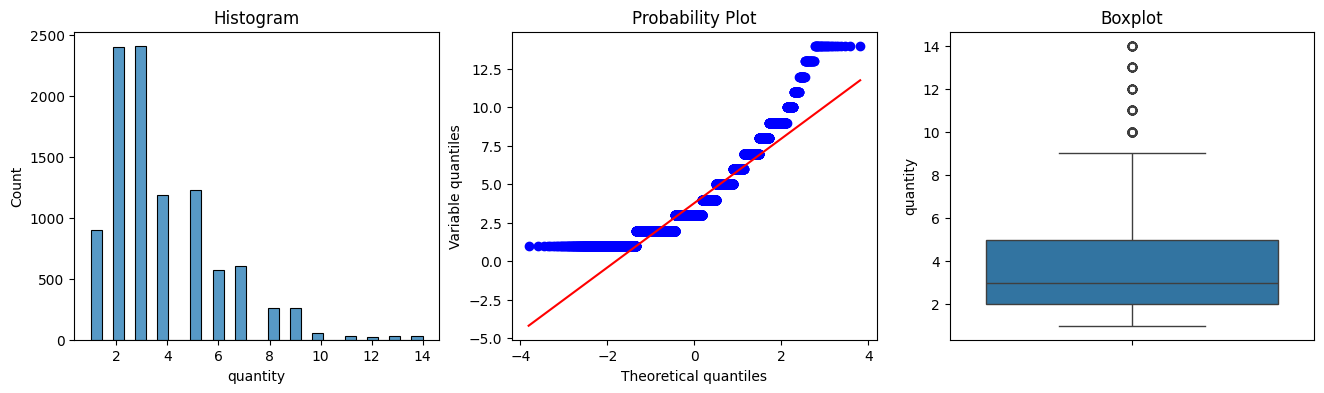

==================== discount ====================


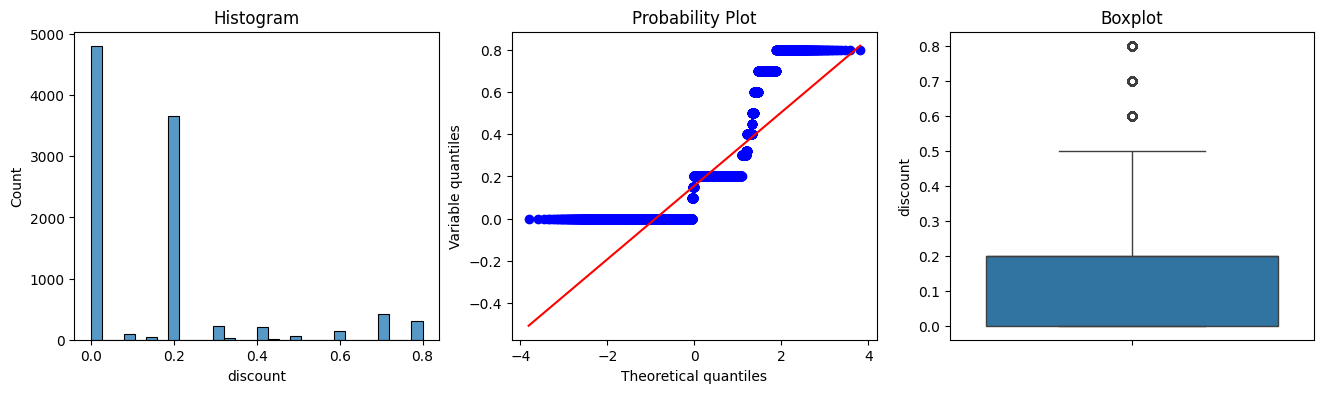

==================== profit ====================


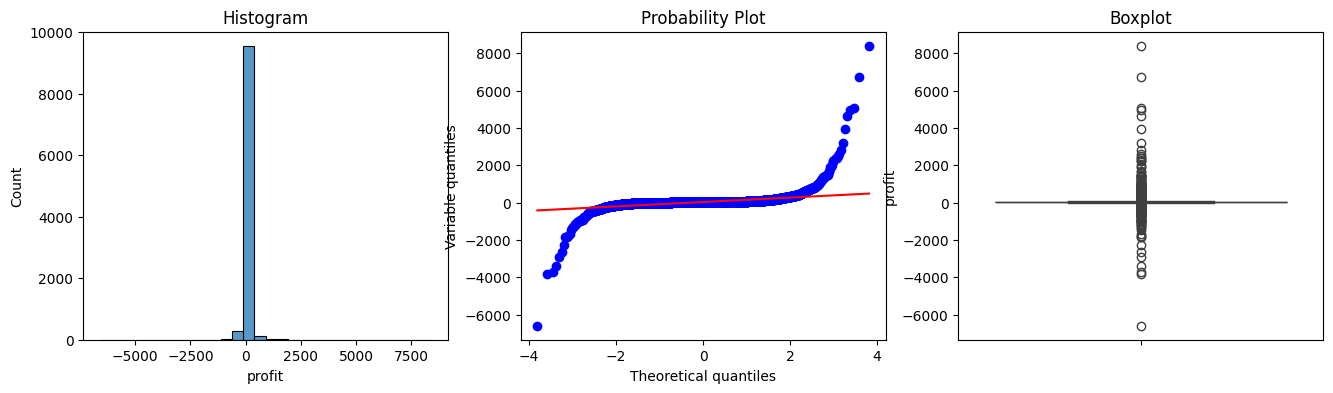

In [12]:
# lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom
# untuk plot Q-Q
import scipy.stats as stats

# Get numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

for i in numeric_cols:
  print(f"==================== {i} ====================")
  check_plot(df, i)

Tidak ada outlier

Data sudah bisa digunkaan untuk powerbi

Segmentasi
At Risk          297
Champions        162
Potential        147
Uncategorized    146
Loyal             41
Name: count, dtype: int64


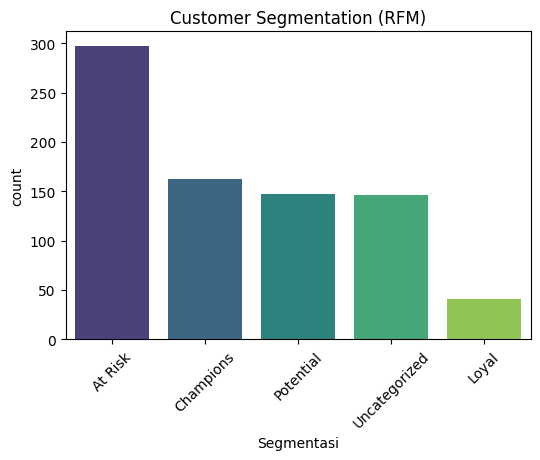

In [16]:
df = pd.read_excel("/content/superstore_dataset (1).xlsx").copy()

# Convert Order Date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# --- RFM Calculation ---
# Reference date = last date in dataset
ref_date = df['order_date'].max()

rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (ref_date - x.max()).days,   # Recency
    'order_id': 'count',                                 # Frequency
    'sales': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID','Recency','Frequency','Monetary']

# Normalize each RFM into score (1–5)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5])

# Combine into single RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(int) * 100 + \
                   rfm['F_Score'].astype(int) * 10 + \
                   rfm['M_Score'].astype(int)

# --- Segmentation based on your mapping ---
def segment_customer(score):
    if 511 <= score <= 555:
        return "Champions"
    elif 451 <= score <= 510:
        return "Loyal"
    elif 351 <= score <= 450:
        return "Potential"
    elif 151 <= score <= 350:
        return "At Risk"
    else:
        return "Uncategorized"

rfm['Segmentasi'] = rfm['RFM_Score'].apply(segment_customer)

# --- Summary segmentation ---
segment_summary = rfm['Segmentasi'].value_counts()

print(segment_summary)

# --- Optional Visualization ---
plt.figure(figsize=(6,4))
sns.countplot(data=rfm, x='Segmentasi', order=segment_summary.index, palette="viridis")
plt.title("Customer Segmentation (RFM)")
plt.xticks(rotation=45)
plt.show()

In [19]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segmentasi
0,AA-10315,184,11,5563.560,2,3,5,235,At Risk
1,AA-10375,19,15,1056.390,5,4,2,542,Champions
2,AA-10480,259,12,1790.512,1,3,3,133,Uncategorized
3,AA-10645,55,18,5086.935,3,4,5,345,At Risk
4,AB-10015,415,6,886.156,1,1,1,111,Uncategorized


In [22]:
#make the rfm table and df as one table
df = pd.merge(df, rfm, left_on='customer_id', right_on='CustomerID')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,profit,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segmentasi
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,41.9136,CG-12520,338,5,1148.7800,1,1,2,112,Uncategorized
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,219.5820,CG-12520,338,5,1148.7800,1,1,2,112,Uncategorized
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,6.8714,DV-13045,19,9,1119.4830,5,2,2,522,Champions
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,-383.0310,SO-20335,29,15,2602.5755,4,4,3,443,Potential
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2.5164,SO-20335,29,15,2602.5755,4,4,3,443,Potential


In [24]:
df.to_csv("rfm_table.csv", index=False)